# Vehicle Collision Severity

## Weather affects and other extrenal predictors

#### Applied Data Science Capstone by IBM/Coursera

## Table of Contents

* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Results](#results)
* [Discussion](#discussion)
* [Conclusion](#conclusion)

This Notebook will be used for the IBM Data Science professional certificate's Applied Data Science Capstone Project.

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm


## Introduction <a name="introduction"></a>

Nothing beats the freedom of a car. There is no schedule to follow, no extra stops, and it can take you just about anywhere you need to go. This freedom is not with out risks though. There are so many factors that can change your normal commute into a terrible day. This project aims understand how environmental factors contribute to collisions. In order to acheive this goal, I will be analyzing a csv of Seattle car accidents in order to determine the enviornmental factors which contribute to more severe vehicle accidents, and ideally be able to identify high risk commute times and days. 

## Data <a name="data"></a>

I will be analyzing the "Collisions—All Years" data set, which contains collisions provided by the Seattle Police Department and recorded by Traffic Records from 2004 to Present which can be found <a href="https://github.com/mjpower515/VehicleAccidentSeverity">here</a>.

<br/>
This Data set lists each collision as one of the following severities:<br/>
<table>
    <tr><th>Code</th><th>Definition</th><th>Count</th></tr>
    <tr><td>3</td><td>Fatality</td><td>349</td></tr>
    <tr><td>2b</td><td>Serious Injury</td><td>3,098</td></tr>
    <tr><td>2</td><td>Injury</td><td>58,688</td></tr>
    <tr><td>1</td><td>Proerty Damage</td><td>137,485</td></tr>
    <tr><td>0</td><td>Unknown</td><td>21,635</td></tr>
</table>

The data set has 40 total columns. There are many features that describe the condition of the driver that lead to the accident, such as intoxication or speeding, as well as descriptions of the accident, such as number of people in the car. While these could certainly offer insights into education methods, my goal is to understand factors outside of the drivers control. With this in mind, I will be investigating Weather, Road conditions, and Light Conditions.

In [2]:
df = pd.read_csv('Data Sets/Collisions.csv')
df.describe(include='all')

,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,FATALITIES,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
count,213797.000000,213797.000000,221266.000000,221266.000000,221266.000000,221266,221266,217554,71823.000000,216680,100863,11775,221265,221266,194767,221266.000000,221266.000000,221266.000000,221266.000000,221266.000000,221266.000000,221266.000000,221266,221266,209299,221265.000000,221265,30188,194787,194578,194658,194490,5188,1.272050e+05,9913,211853,194767,221266.000000,2.212660e+05,221266
unique,NaN,NaN,NaN,NaN,NaN,221263,2,3,NaN,25193,2,1,5,5,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6079,169122,7,NaN,40,1,4,12,9,9,1,NaN,1,63,62,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,1782439,Matched,Block,NaN,BATTERY ST TUNNEL NB BETWEEN ALASKAN WY VI NB ...,,"Not Enough Information, or Insufficient Locati...",1,Property Damage Only Collision,Parked Car,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006/11/02 00:00:00+00,11/2/2006,Mid-Block (not related to intersection),NaN,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Y,N,Clear,Dry,Daylight,Y,NaN,Y,32,One parked--one moving,NaN,NaN,N
freq,NaN,NaN,NaN,NaN,NaN,2,194840,144857,NaN,298,89088,11775,137485,137485,48455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,103,103,101579,NaN,91958,30188,103482,114361,128171,119166,5188,NaN,9913,44842,44842,NaN,NaN,209290
mean,-122.330752,47.620205,110633.500000,144603.603179,144831.128840,NaN,NaN,NaN,37616.272768,NaN,NaN,NaN,NaN,NaN,NaN,2.226230,0.038103,0.027293,1.728544,0.373844,0.015149,0.001681,NaN,NaN,NaN,13.383558,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.971063e+06,NaN,NaN,NaN,261.441573,9.588454e+03,NaN
std,0.030054,0.056040,63874.136669,89039.925169,89413.579421,NaN,NaN,NaN,51905.450406,NaN,NaN,NaN,NaN,NaN,NaN,1.470364,0.201745,0.164345,0.831224,0.732086,0.157908,0.044562,NaN,NaN,NaN,7.302961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.611523e+06,NaN,NaN,NaN,3248.850406,7.150262e+04,NaN
min,-122.419091,47.495573,1.000000,1001.000000,1001.000000,NaN,NaN,NaN,23807.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.007024e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
25%,-122.349280,47.577302,55317.250000,71603.250000,71603.250000,NaN,NaN,NaN,28653.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,11.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.007029e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
50%,-122.330348,47.616053,110633.500000,127122.500000,127122.500000,NaN,NaN,NaN,29973.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,11.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.033011e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
75%,-122.311998,47.664290,165949.750000,209654.750000,209874.750000,NaN,NaN,NaN,33984.000000,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,NaN,NaN,NaN,14.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.018101e+07,NaN,NaN,NaN,0.000000,0.000000e+00,NaN


In [3]:
Feat = df[['X','Y','WEATHER','ROADCOND','LIGHTCOND', 'SEVERITYCODE']]
Feat = Feat.replace(to_replace='Unknown')
Feat.isnull().sum()

X                7469
Y                7469
WEATHER         28243
ROADCOND        28227
LIGHTCOND       28222
SEVERITYCODE        1
dtype: int64

In [4]:
null =0
notnull=0
for i in range(len(Feat.index)):
    if Feat.iloc[i].isnull().sum()>0:
        null+=1
    else:
        notnull+=1

print(null, " rows contain null which is ", round(null/(null+notnull),4)*100,"% of the data set.")

34091  rows contain null which is  15.409999999999998 % of the data set.


In [5]:
NoNA = Feat.dropna(axis=0,how='any')
NoNA

,X,Y,WEATHER,ROADCOND,LIGHTCOND,SEVERITYCODE
0,-122.386772,47.564720,Clear,Dry,Daylight,2
1,-122.341806,47.686934,Raining,Wet,Dark - Street Lights On,2
2,-122.374899,47.668666,Clear,Dry,Daylight,1
3,-122.300758,47.683047,Raining,Wet,Dark - Street Lights On,1
6,-122.323569,47.722577,Clear,Dry,Dark - Street Lights On,1
...,...,...,...,...,...,...
221261,-122.329060,47.605233,Overcast,Dry,Daylight,1
221262,-122.314961,47.523468,Clear,Dry,Daylight,2
221263,-122.334203,47.575576,Clear,Dry,Daylight,1
221264,-122.310259,47.594214,Clear,Dry,Daylight,1


In [6]:
Feat['SEVERITYCODE'].value_counts()

1     137485
2      58698
0      21635
2b      3098
3        349
Name: SEVERITYCODE, dtype: int64

In [7]:
NoNA['SEVERITYCODE'].value_counts()

1     127446
2      56423
2b      2975
3        329
0          2
Name: SEVERITYCODE, dtype: int64

In [8]:
Feat['SEVERITYCODE'].value_counts() - NoNA['SEVERITYCODE'].value_counts()

0     21633
1     10039
2      2275
2b      123
3        20
Name: SEVERITYCODE, dtype: int64

In [9]:
NoNA[['Injury']]= NoNA[['SEVERITYCODE']] != '1'
NoNA[['Injury']]=NoNA[['Injury']].astype(int)

C:\Users\Mike\anaconda3\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


## Methodology <a name="methodology"></a>

### Exploratory Analysis

With the goal of discovering relationships between environmental factors and accident severity, I looked at each category of each feature, as a percentage of injuries.

In [10]:
NoNA.columns = NoNA.columns.get_level_values(0)

In [11]:
feats = ['WEATHER','ROADCOND','LIGHTCOND']

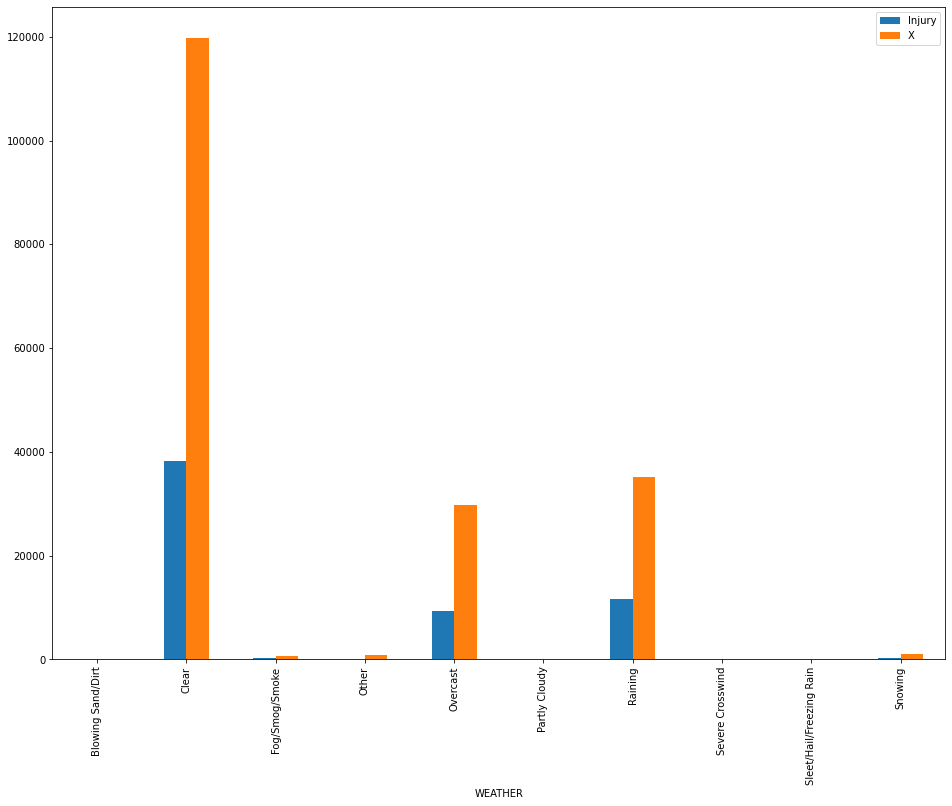

In [12]:
col = feats[0]
NoNA.groupby(col).agg({'Injury':sum,'X':'count'}).plot(kind='bar', figsize=(16,12))

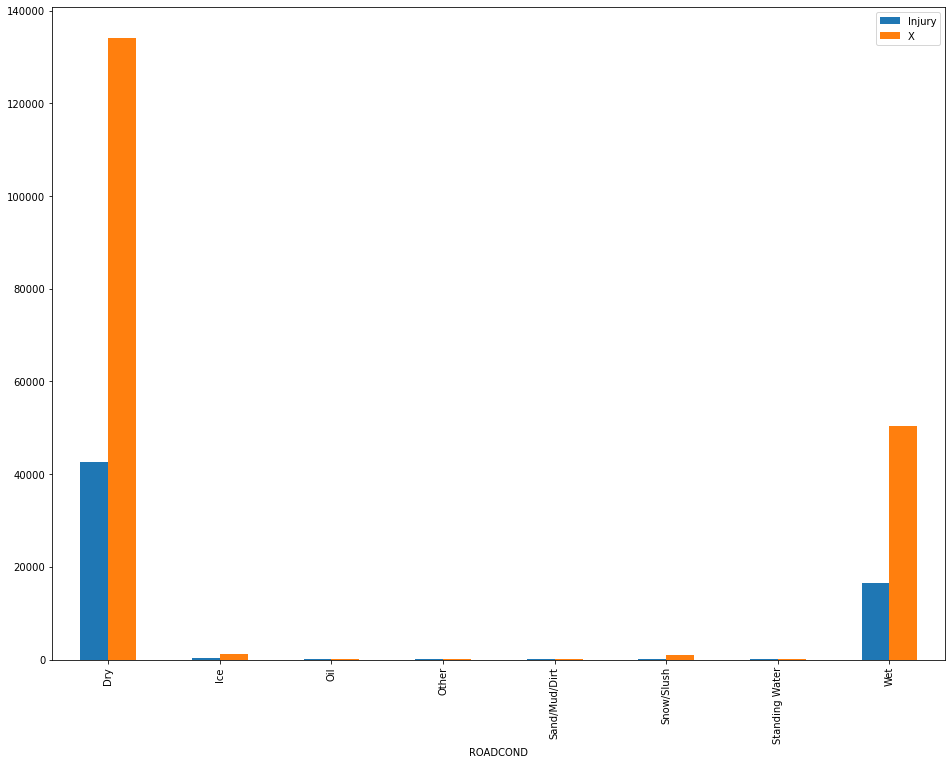

In [13]:
col = feats[1]
NoNA.groupby(col).agg({'Injury':sum,'X':'count'}).plot(kind='bar', figsize=(16,12))

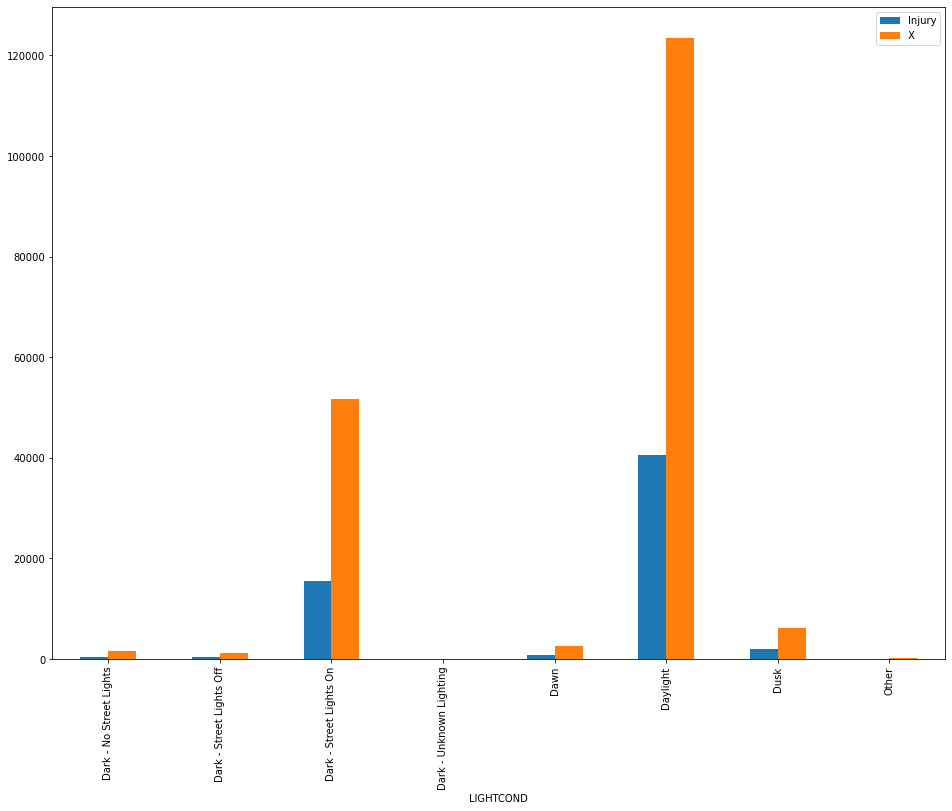

In [14]:
col = feats[2]
NoNA.groupby(col).agg({'Injury':sum,'X':'count'}).plot(kind='bar', figsize=(16,12))

In [15]:
comb = NoNA.groupby(feats).agg({'Injury':sum,'X':'count'}) #.plot(kind='bar', figsize=(16,12))
comb.sort_values('X',ascending=False)
comb.reset_index(level=0, inplace=True)
comb.reset_index(level=0, inplace=True)
comb.reset_index(level=0, inplace=True)
comb['Injury %'] = comb['Injury']/comb['X']
comb

,LIGHTCOND,ROADCOND,WEATHER,Injury,X,Injury %
0,Dark - No Street Lights,Dry,Blowing Sand/Dirt,0,1,0.000000
1,Dark - Street Lights On,Dry,Blowing Sand/Dirt,4,9,0.444444
2,Dawn,Dry,Blowing Sand/Dirt,1,1,1.000000
3,Daylight,Dry,Blowing Sand/Dirt,2,15,0.133333
4,Dusk,Dry,Blowing Sand/Dirt,0,2,0.000000
...,...,...,...,...,...,...
242,Dark - Street Lights Off,Wet,Snowing,0,1,0.000000
243,Dark - Street Lights On,Wet,Snowing,22,65,0.338462
244,Dawn,Wet,Snowing,3,8,0.375000
245,Daylight,Wet,Snowing,22,80,0.275000


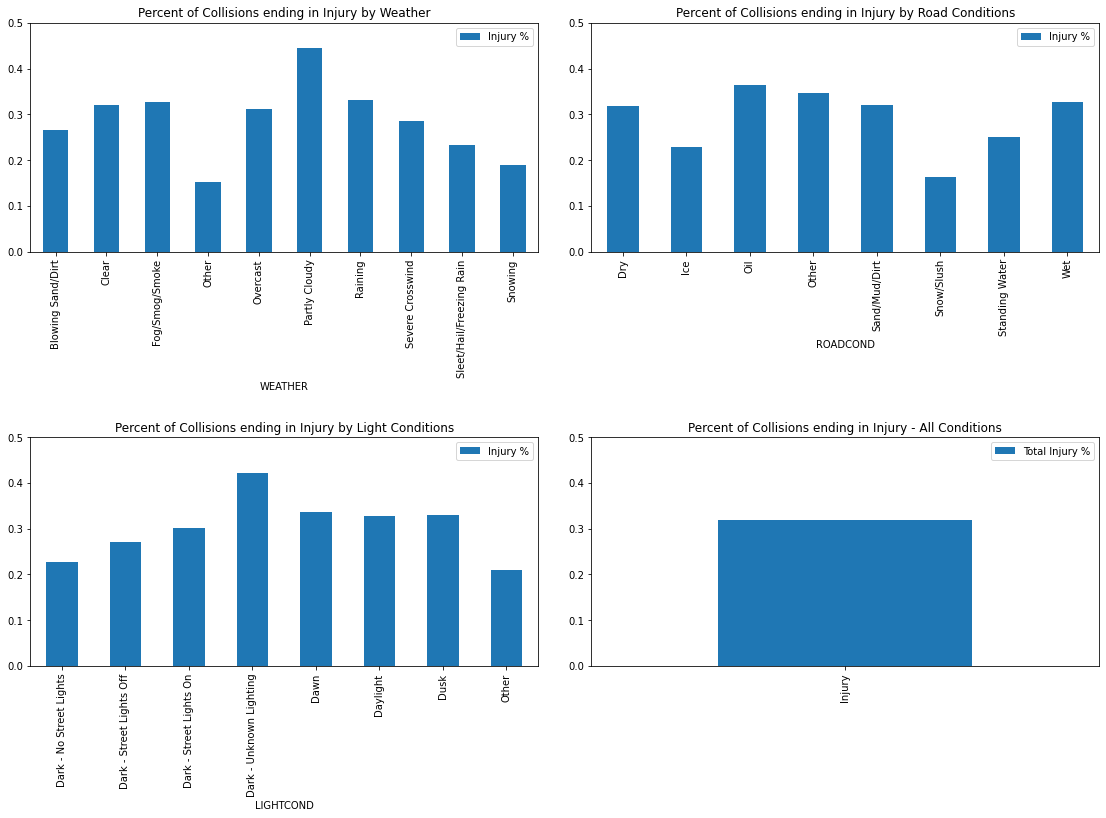

In [16]:

Tot_W = 16
Tot_H = 12
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(Tot_W,Tot_H))
col = feats[0]
w = NoNA.groupby(col).agg({'Injury':sum,'X':'count'})
w['Injury %'] = w['Injury']/w['X']
weAx = w.plot(y='Injury %', kind='bar', ax = axes[0,0])
axes[0,0].set_title(label="Percent of Collisions ending in Injury by Weather")

col = feats[1]
r = NoNA.groupby(col).agg({'Injury':sum,'X':'count'})
r['Injury %'] = r['Injury']/r['X']
rAx = r.plot(y='Injury %', kind='bar', ax = axes[0,1])
axes[0,1].set_title(label="Percent of Collisions ending in Injury by Road Conditions")

col = feats[2]
l = NoNA.groupby(col).agg({'Injury':sum,'X':'count'})
l['Injury %'] = l['Injury']/l['X']
lAx = l.plot(y='Injury %', kind='bar', ax = axes[1,0])
axes[1,0].set_title(label="Percent of Collisions ending in Injury by Light Conditions")

al = pd.DataFrame({'Total Injury %': NoNA[['Injury']].sum()/len(NoNA[['X']])})
Ax = al.plot(y='Total Injury %', kind='bar', ax = axes[1,1])
axes[1,1].set_title(label="Percent of Collisions ending in Injury - All Conditions")
weAx.set_ylim(0,.5)
rAx.set_ylim(0,.5)
lAx.set_ylim(0,.5)
Ax.set_ylim(0,.5)
fig.tight_layout(pad=3.0)
plt.savefig('Injury % Chart.png')

As you can see, with each category, the percentage varies. Some surprising results include the lower percentage in snow/slush on the road, as well as Partly Cloudy having the highest percentage for all weather types. With most categories within roughly 10 points of the total data set, no individual category needs to be investigated further.

I then counted each combination of the three categories and sorted them by number of incidents. I charted the top 10 and combined the other 237 combinations into an “Other” label.

In [17]:
combined_columns = feats[0] + ', ' + feats[1] + ', ' +feats[2]
temp = NoNA.copy()
temp[combined_columns] = NoNA[feats[0]] + ', ' + NoNA[feats[1]] + ', ' + NoNA[feats[2]]
temp.drop(axis = 1, labels = feats)
temp = temp.groupby(combined_columns).agg({'Injury':sum,'X':'count'})
temp.reset_index(level=0, inplace=True)
temp.sort_values('X',ascending=False, inplace=True)
temp

,"WEATHER, ROADCOND, LIGHTCOND",Injury,X
18,"Clear, Dry, Daylight",27128,82116
15,"Clear, Dry, Dark - Street Lights On",7758,26410
189,"Raining, Wet, Daylight",5925,17638
186,"Raining, Wet, Dark - Street Lights On",4509,13609
114,"Overcast, Dry, Daylight",3902,12240
...,...,...,...
132,"Overcast, Sand/Mud/Dirt, Dusk",0,1
129,"Overcast, Other, Other",0,1
125,"Overcast, Oil, Dusk",0,1
118,"Overcast, Ice, Dark - Street Lights Off",1,1


In [18]:
Ind = 10
i=0
dat=[]
a=['Other',0,0]
for index, row in temp.iterrows():
    if i < Ind:
        dat.append(list(temp.loc[index]))
    else:
        a[1]+=int(list(temp.loc[index])[1])
        a[2]+=int(list(temp.loc[index])[2])
    
    i+=1
dat.append(a)
combined = pd.DataFrame(dat, columns = temp.columns)
combined['Injury %'] = combined['Injury']/combined['X']

combined.set_index('WEATHER, ROADCOND, LIGHTCOND', inplace=True)
combined.rename(columns = {'X':'Collisions'}, inplace = True)


<Figure size 432x288 with 0 Axes>

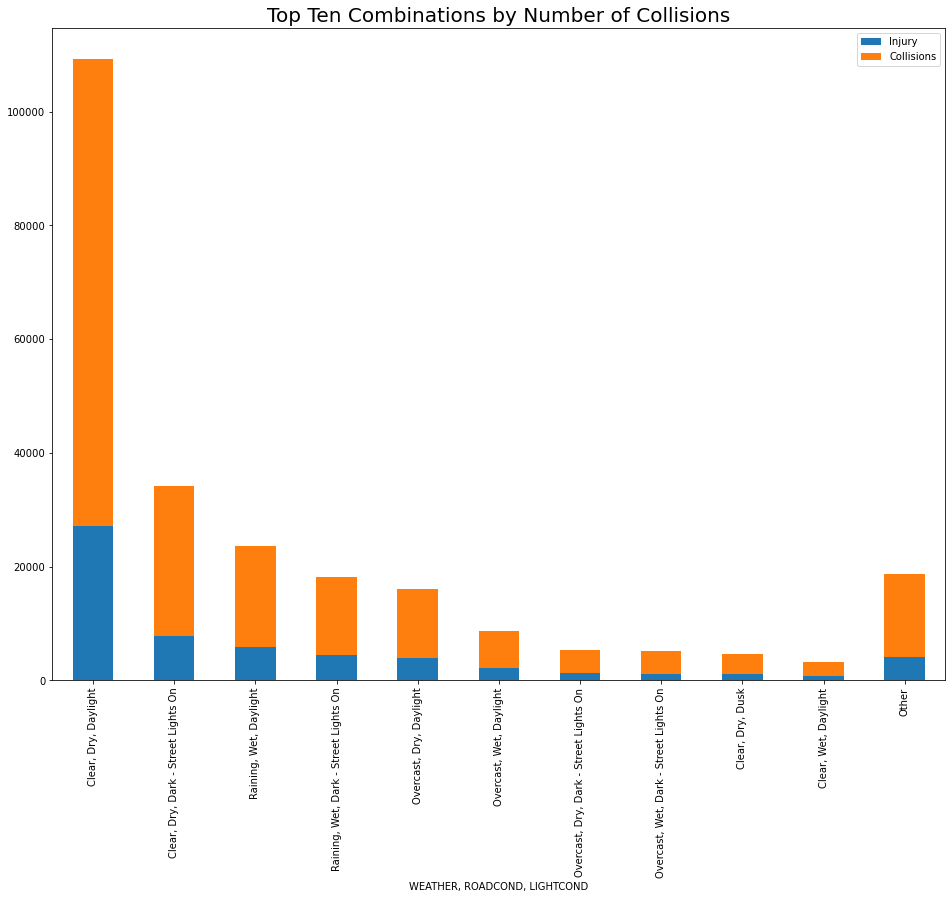

In [19]:
# combined.plot(y = ['Injury %', 'Collisions'],secondary_y=['Injury %'], kind='bar',figsize = (16,12))
fig = plt.figure()
ax = combined.plot(y = ['Injury', 'Collisions'], kind='bar',figsize = (16,12), stacked=True)
ax.title = plt.title(label = "Top Ten Combinations by Number of Collisions", fontdict= {'fontsize':20}, loc="Center")
plt.savefig('Feature Combination Top Ten.jpg')

You can see that more collisions occur during clear weather, with a dry road during daylight. I would guess that the most driving happens in these conditions. Because our question takes the accident as a given, the size disparities between each group would not be expected to have a large effect on a model’s ability to asses the probability of injury.

I also graphed the grouped combinations by % of collisions resulting in an injury in a similar way to the collisions above.

In [20]:
Ind = 10
i=0
temp['Injury %'] = temp['Injury']/temp['X']
temp.sort_values('Injury %',ascending=False, inplace=True)
dat=[]
a=['Other',0,0]
for index, row in temp.iterrows():
    if i < Ind:
        dat.append(list(temp.loc[index]))
        i+=1
    else:
        a[1]+=int(list(temp.loc[index])[1])
        a[2]+=int(list(temp.loc[index])[2])
    
    
dat.append(a)
combinedPerc = pd.DataFrame(dat, columns = temp.columns)
combinedPerc['Injury %'] = combinedPerc['Injury']/combinedPerc['X']


combinedPerc.set_index('WEATHER, ROADCOND, LIGHTCOND', inplace=True)
combinedPerc.rename(columns = {'X':'Collisions'}, inplace = True)

<Figure size 432x288 with 0 Axes>

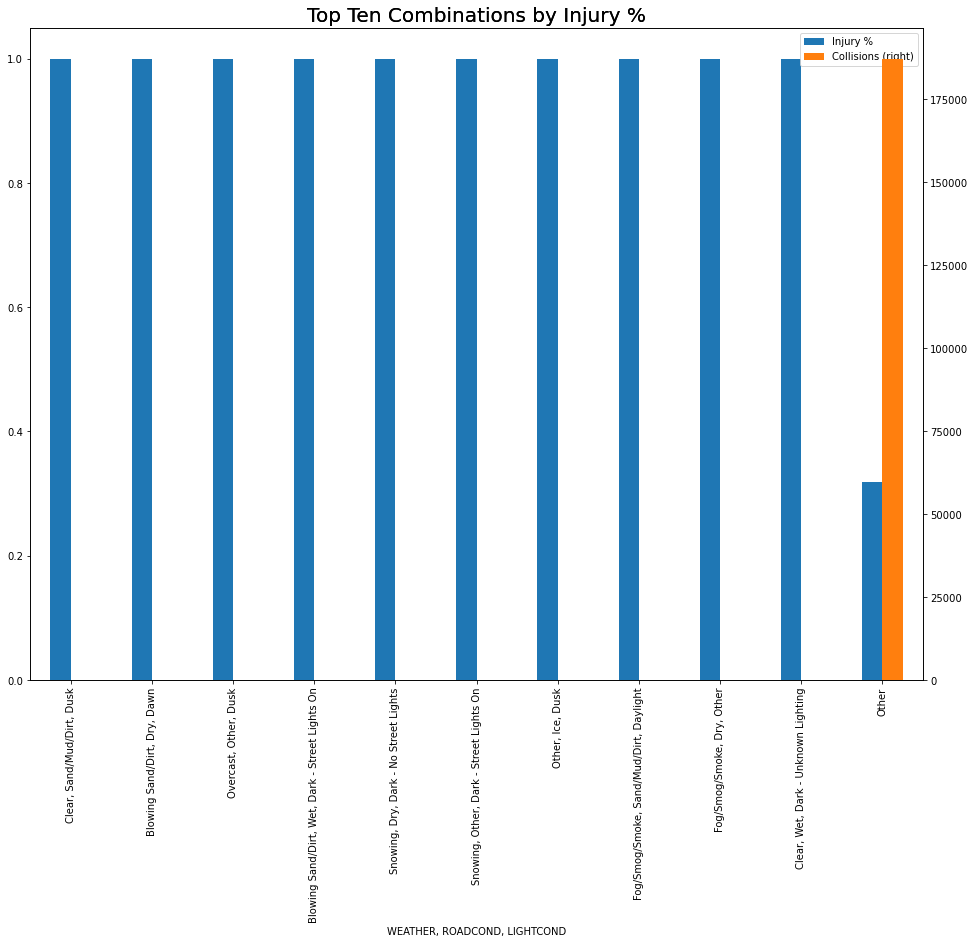

In [21]:

fig = plt.figure()
ax = combinedPerc.plot(y = ['Injury %', 'Collisions'],secondary_y='Collisions', kind='bar',figsize = (16,12))
ax.title = plt.title(label = "Top Ten Combinations by Injury %", fontdict= {'fontsize':20}, loc="Center")
plt.savefig('Feature Combination Top Ten By Injury %.jpg')

 When I looked at the top 10 of these, I noticed all but the “Other” category had minimal collisions and 100% injury rate. In the case of these rarer combinations, I removed them from my training set. With such a small sample size, I would expect a model to assume these combinations at  a near 100% injury rate and perform poorly on these conditions should they arise again. That being said, since each combination is valid, when assessing model performance, these incidents will be considered. I looked into how many combinations had 100% injury rate with minimal collisions, and have removed and combination with less than 5 collisions from my testing data. The Category volumes before and after are pictured below.

In [22]:
dat=[]
comb =[]
i=0

for index, row in temp.iterrows():
    if row['X'] < 5:
        comb.append(row['WEATHER, ROADCOND, LIGHTCOND'].split(", "))

for index, row in NoNA.iterrows():
    bool=False
    for l in comb:
        if row['WEATHER'] == l[0] and row['ROADCOND'] == l[1] and row['LIGHTCOND'] == l[2]:
            bool = True
            break

    if not bool:
        dat.append(list(row))
        
remFreq = pd.DataFrame(dat, columns = NoNA.columns)
remFreq

,X,Y,WEATHER,ROADCOND,LIGHTCOND,SEVERITYCODE,Injury
0,-122.386772,47.564720,Clear,Dry,Daylight,2,1
1,-122.341806,47.686934,Raining,Wet,Dark - Street Lights On,2,1
2,-122.374899,47.668666,Clear,Dry,Daylight,1,0
3,-122.300758,47.683047,Raining,Wet,Dark - Street Lights On,1,0
4,-122.323569,47.722577,Clear,Dry,Dark - Street Lights On,1,0
...,...,...,...,...,...,...,...
186983,-122.329060,47.605233,Overcast,Dry,Daylight,1,0
186984,-122.314961,47.523468,Clear,Dry,Daylight,2,1
186985,-122.334203,47.575576,Clear,Dry,Daylight,1,0
186986,-122.310259,47.594214,Clear,Dry,Daylight,1,0


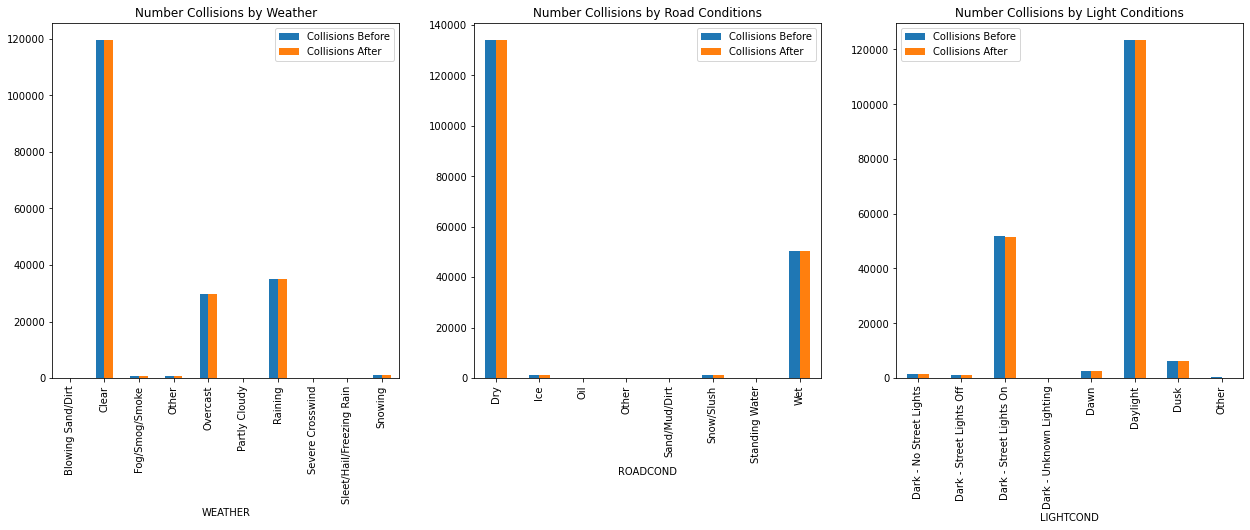

In [23]:
Tot_W = 18
Tot_H = 8
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(Tot_W,Tot_H))
graph_type = 'bar'
col = feats[0]
w = NoNA.groupby(col).agg({'Injury':sum,'X':'count'})
w.rename(columns = {'X':'Collisions Before'}, inplace = True)
w['Collisions After'] = remFreq.groupby(col).agg({'Injury':sum,'X':'count'})['X']
weAx = w.plot(y=['Collisions Before','Collisions After'], kind=graph_type, ax = axes[0])
axes[0].set_title(label="Number Collisions by Weather")

col = feats[1]
r = NoNA.groupby(col).agg({'Injury':sum,'X':'count'})
r.rename(columns = {'X':'Collisions Before'}, inplace = True)
r['Collisions After'] = remFreq.groupby(col).agg({'Injury':sum,'X':'count'})['X']
rAx = r.plot(y=['Collisions Before','Collisions After'], kind=graph_type, ax = axes[1])
axes[1].set_title(label="Number Collisions by Road Conditions")

col = feats[2]
l = NoNA.groupby(col).agg({'Injury':sum,'X':'count'})
l.rename(columns = {'X':'Collisions Before'}, inplace = True)
l['Collisions After'] = remFreq.groupby(col).agg({'Injury':sum,'X':'count'})['X']
lAx = l.plot(y=['Collisions Before','Collisions After'], kind=graph_type, ax = axes[2])
axes[2].set_title(label="Number Collisions by Light Conditions")


fig.tight_layout(pad=3.0)
plt.savefig('Collision Volumes.png')

### Regression

Using only environmental factors, I don’t expect a high predictability of injury. Instead, my goal is to use probabilities to identify which situations are most likely to result in injury. To that end, logistic regression and K-nearest neighbors will be trained on an 80/20 train/test split.

Using K-Nearest Neighbors, it is important to choose a K that generalizes well, while still getting specific enough data. Given the size of the data set, the resources needed to check every possible K was not viable, instead I stepped through potential K’s by 8. 

In [24]:
X  = pd.get_dummies(remFreq[feats])
y = remFreq['Injury'].values
#This Weather Category exists in NoNA but not remFreq which stops models from being able to work on No NA
#Added it back into X to ensure training is applicable to all noted Weather labels
X['WEATHER_Partly Cloudy'] = 0
X

,WEATHER_Blowing Sand/Dirt,WEATHER_Clear,WEATHER_Fog/Smog/Smoke,WEATHER_Other,WEATHER_Overcast,WEATHER_Raining,WEATHER_Severe Crosswind,WEATHER_Sleet/Hail/Freezing Rain,WEATHER_Snowing,ROADCOND_Dry,ROADCOND_Ice,ROADCOND_Oil,ROADCOND_Other,ROADCOND_Sand/Mud/Dirt,ROADCOND_Snow/Slush,ROADCOND_Standing Water,ROADCOND_Wet,LIGHTCOND_Dark - No Street Lights,LIGHTCOND_Dark - Street Lights Off,LIGHTCOND_Dark - Street Lights On,LIGHTCOND_Dark - Unknown Lighting,LIGHTCOND_Dawn,LIGHTCOND_Daylight,LIGHTCOND_Dusk,LIGHTCOND_Other,WEATHER_Partly Cloudy
0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186983,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
186984,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
186985,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
186986,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [25]:
import random
seed = random.randrange(1,1000)
print(seed)

50


In [26]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import train_test_split
from sklearn import metrics
X_train,X_Test,y_train,y_test = train_test_split(X,y, test_size=.2, random_state=366) # random state determined by seed above

In [28]:
# explore and find error for each K 2 - 75


train_error = []
test_error = []

for k in range(2,75,8):
    neigh = KNN(n_neighbors = k).fit(X_train, y_train)
    train_error.append((k, metrics.accuracy_score(y_train, neigh.predict(X_train))))
    test_error.append((k, metrics.accuracy_score(y_test, neigh.predict(X_Test))))


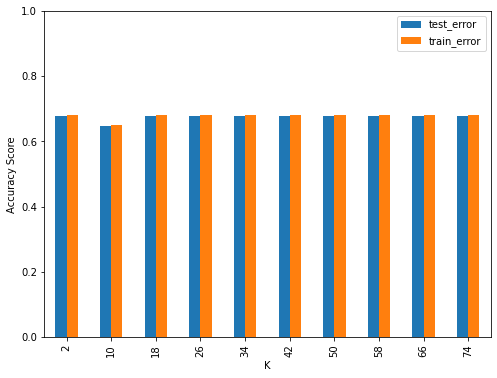

In [29]:
error = pd.DataFrame(test_error, columns=['K','test_error'])
train_error = pd.DataFrame(train_error, columns =['K','train_error'])
error['train_error'] = train_error[['train_error']] 
error.set_index('K', inplace=True)
ax = error.plot(kind='bar',figsize=(8,6),ylim=(0,1))
ax.set_ylabel('Accuracy Score')
plt.savefig('KNN Error Chart.png')

This shows that each K has a small dip in success on the test set than the train set. Given that accuracy of the model increases a small amount at 34, that is the K chosen.

Logistic Regression has some hyperparameters to consider as well. In scikit learn, the logistic Regression model offers 4 solvers. Rather forcing a decision, I check all 5, namely newton-cg, lbfgs, liblinear, sag, and saga. Below you can see that each solver performed equally well.

In [30]:
from sklearn.linear_model import LogisticRegression as logR
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga' ]

In [31]:
# Letting C remain the default, because the Size of the data should support the number of parameters
# check the different solver options
train_error = []
test_error = []
for s in solvers:
    lReg= logR(solver=s, max_iter=1000).fit(X_train,y_train)
    train_error.append((s, metrics.accuracy_score(y_train, lReg.predict(X_train))))
    test_error.append((s, metrics.accuracy_score(y_test, lReg.predict(X_Test))))
    
logR_error = pd.DataFrame(test_error, columns=['Solver','test_error'])
train_error = pd.DataFrame(train_error, columns =['Solver','train_error'])
logR_error['train_error'] = train_error[['train_error']] 
logR_error.set_index('Solver', inplace=True)
logR_error

,test_error,train_error
Solver,,
newton-cg,0.679074,0.681329
lbfgs,0.679074,0.681329
liblinear,0.679074,0.681329
sag,0.679074,0.681329
saga,0.679074,0.681329


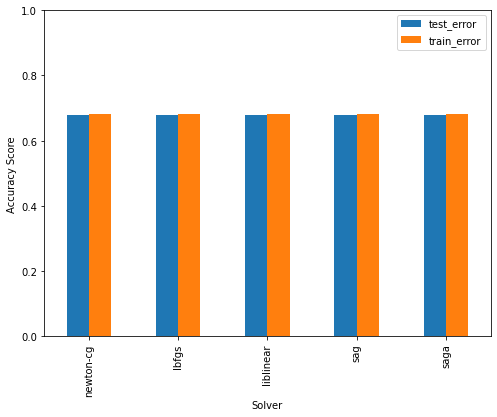

In [32]:
ax = logR_error.plot(kind='bar',figsize=(8,6),ylim=(0,1))
ax.set_ylabel('Accuracy Score')
plt.savefig('LogReg Error Chart.png')

Finally, we consider which model performs better, K Nearest Neighbors with K=34 or Logistic Regression with the newton-cg solver. To evaluate these models, we will put the outliers back in, considering all collisions with know injury out comes.

In [33]:
final_KNN = KNN(n_neighbors = 34).fit(X_train, y_train)
final_LogReg = logR(solver='newton-cg', max_iter=1000).fit(X_train, y_train)

In [34]:
full_y = NoNA['Injury']
full_X = pd.get_dummies(NoNA[feats])

In [35]:
# Verify shape of data is as expected
print(y_train.shape)
print(full_y.shape)
print(X_train.shape)
print(full_X.shape)

(149590,)
(187175,)
(149590, 26)
(187175, 26)


In [36]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import multilabel_confusion_matrix

In [37]:
evalList = [('KNN',jaccard_score(full_y,final_KNN.predict(full_X)),
             f1_score(full_y,final_KNN.predict(full_X), average = 'weighted')),
            ('LogisticRegression',jaccard_score(full_y,final_LogReg.predict(full_X)),
             f1_score(full_y,final_LogReg.predict(full_X), average = 'weighted'))]
Assesmentdf = pd.DataFrame(evalList, columns=['Algorithm','Jaccard','F1-score'])
Assesmentdf.set_index('Algorithm',inplace=True)
Assesmentdf


,Jaccard,F1-score
Algorithm,,
KNN,0.0,0.551629
LogisticRegression,0.0,0.551629


Both models had the same F1-score (.551629) and Jaccard score (0).

In [38]:
ConfMat = multilabel_confusion_matrix(full_y,final_LogReg.predict(full_X))

In [39]:
print(ConfMat)

[[[     0  59729]
  [     0 127446]]

 [[127446      0]
  [ 59729      0]]]


After some investigation, I found that neither model was predicting injuries, as is seen in the confustion matrix above.

In [40]:
LRdf = pd.DataFrame(final_LogReg.predict_proba(full_X), 
                  columns = ['Probability of no Injury', 'Probability of Injury'])

In [41]:
KNNdf = pd.DataFrame(final_KNN.predict_proba(full_X), 
                  columns = ['Probability of no Injury', 'Probability of Injury'])

In [42]:
tempX= full_X.reset_index()
LRdf[list(tempX.columns)] = tempX
KNNdf[list(tempX.columns)] = tempX

In [44]:
l=[]
for index, row in LRdf.iterrows():
    tmp1 = row[2:]
    weth=''
    road=''
    light=''
    for a, e,in list(zip(tmp1,tmp1.index)):
        if a ==1:
            if e.find('WEATHER_') !=-1:
                    weth = e.split('_')[1]
            if e.find('ROADCOND_') !=-1:
                    road = e.split('_')[1]
            if e.find('LIGHTCOND_') !=-1:
                    light = e.split('_')[1]
    l.append(weth + ', ' + road + ', ' + light)
    
probs = pd.DataFrame(l, columns=[combined_columns])
probs['LogReg Probability of Injury']=LRdf[['Probability of Injury']]
probs = probs.groupby(combined_columns).mean()
probs.sort_values('LogReg Probability of Injury',ascending=False, inplace=True)

In [45]:
l=[]
for index, row in KNNdf.iterrows():
    tmp1 = row[2:]
    weth=''
    road=''
    light=''
    for a, e,in list(zip(tmp1,tmp1.index)):
        if a ==1:
            if e.find('WEATHER_') !=-1:
                    weth = e.split('_')[1]
            if e.find('ROADCOND_') !=-1:
                    road = e.split('_')[1]
            if e.find('LIGHTCOND_') !=-1:
                    light = e.split('_')[1]
    l.append(weth + ', ' + road + ', ' + light)
    
probsKNN = pd.DataFrame(l, columns=[combined_columns])
probsKNN['KNN Probability of Injury']=KNNdf[['Probability of Injury']]
probsKNN = probsKNN.groupby(combined_columns).mean()
probsKNN.sort_values('KNN Probability of Injury',ascending=False, inplace=True)

In [46]:
probs['KNN Probability of Injury'] = probsKNN['KNN Probability of Injury']

In [47]:
probs

,LogReg Probability of Injury,KNN Probability of Injury
"WEATHER, ROADCOND, LIGHTCOND",,
"Fog/Smog/Smoke, Ice, Dark - Street Lights On",0.462026,0.294118
"Raining, Ice, Dark - Street Lights On",0.458083,0.411765
"Clear, Ice, Dark - Street Lights On",0.457664,0.470588
"Snowing, Ice, Dark - Street Lights On",0.456256,0.264706
"Severe Crosswind, Ice, Dark - Street Lights On",0.456158,0.352941
...,...,...
"Other, Dry, Dark - No Street Lights",0.084034,0.117647
"Other, Wet, Dark - No Street Lights",0.079035,0.147059
"Other, Sand/Mud/Dirt, Daylight",0.077086,0.147059


The probability of injury for both models ranged from 46.2026% and 5.542% across different environmental factors, but none predicted injury because no matter the condition, the driver is more likely to remain uninjured in the event of a collision. The chart below shows that, for the 20 most dangerous conditions, the K-Nearest Neighbors model and the Logistic Regression model have the exact same probabilities. Because of this, all further discussion will only refer to the Logistic Regression model, as it runs faster on large data sets than K=34 K-Nearest Neighbors.

<Figure size 432x288 with 0 Axes>

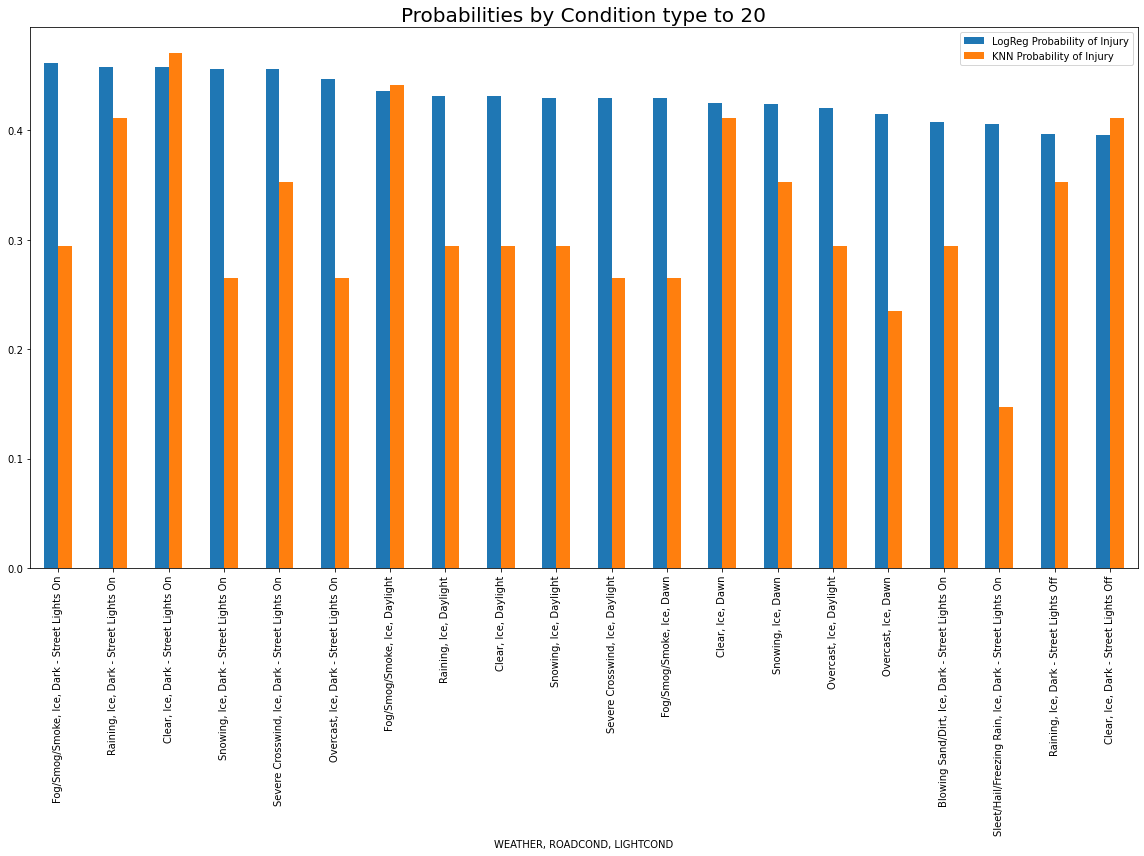

In [48]:
fig = plt.figure()
ax = probs.iloc[:20].plot(y = ['LogReg Probability of Injury', 'KNN Probability of Injury'], 
                   kind='bar',figsize = (16,12))

ax.title = plt.title(label = "Probabilities by Condition type to 20", fontdict= {'fontsize':20}, loc="Center")
plt.tight_layout()
plt.savefig('Probabilities Top Twenty.png')

In [49]:
NoNA_Grouped = temp.set_index(combined_columns)
probs['Injury Proportion'] = NoNA_Grouped[['Injury %']]
probs['Collisions'] = NoNA_Grouped['X']
probs

,LogReg Probability of Injury,KNN Probability of Injury,Injury Proportion,Collisions
"WEATHER, ROADCOND, LIGHTCOND",,,,
"Fog/Smog/Smoke, Ice, Dark - Street Lights On",0.462026,0.294118,0.380952,21
"Raining, Ice, Dark - Street Lights On",0.458083,0.411765,0.153846,13
"Clear, Ice, Dark - Street Lights On",0.457664,0.470588,0.225191,262
"Snowing, Ice, Dark - Street Lights On",0.456256,0.264706,0.116883,77
"Severe Crosswind, Ice, Dark - Street Lights On",0.456158,0.352941,0.000000,1
...,...,...,...,...
"Other, Dry, Dark - No Street Lights",0.084034,0.117647,0.285714,7
"Other, Wet, Dark - No Street Lights",0.079035,0.147059,0.500000,2
"Other, Sand/Mud/Dirt, Daylight",0.077086,0.147059,0.000000,1


## Results <a name="results"></a>

Because the models do not predict any injuries, the best way to understand the value that the applying Logistic 
Regression added is to consider the proportion of injuries in each category to the probabilities predicted by the model.

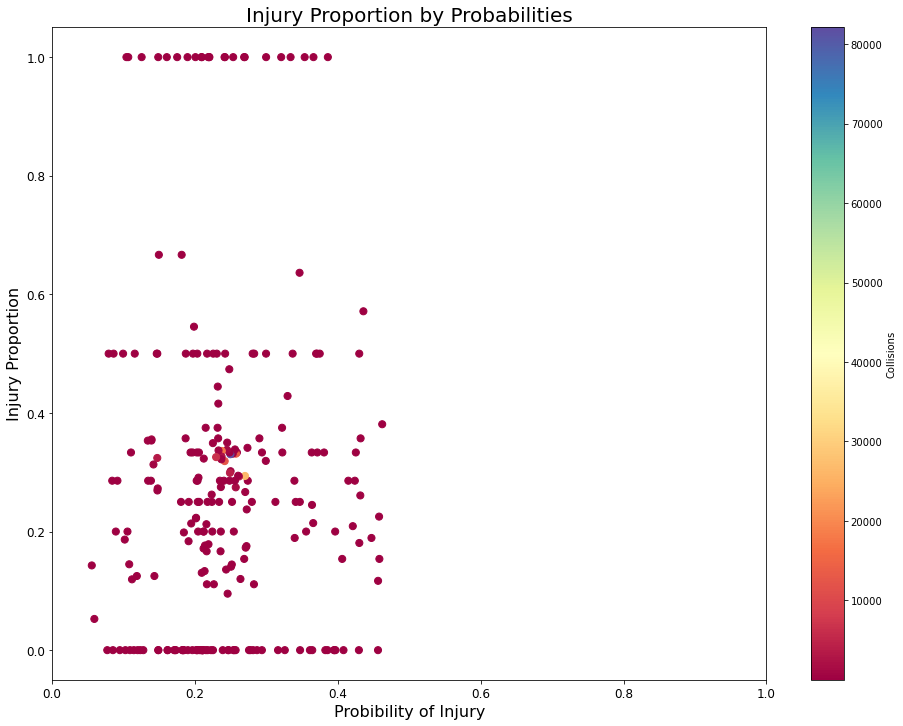

In [50]:
ax = probs.plot(x='LogReg Probability of Injury',
                y='Injury Proportion', kind = 'scatter', c='Collisions', 
                colormap=cm.Spectral, colorbar=True, figsize=(16,12), sharex=False, fontsize=12, s=50, xlim=(0,1))
plt.xlabel('Probibility of Injury', fontsize = 16)
plt.ylabel('Injury Proportion', fontsize = 16)
ax.title = plt.title(label = "Injury Proportion by Probabilities", 
                     fontdict= {'fontsize':20}, loc="Center")
plt.savefig('Injury Proportion by Probabilities All.png')

Below are the points split out by number of collisions, this gives a clearer picture of how the small subgroups have injury proportions that don not match well to the expected probabilities.

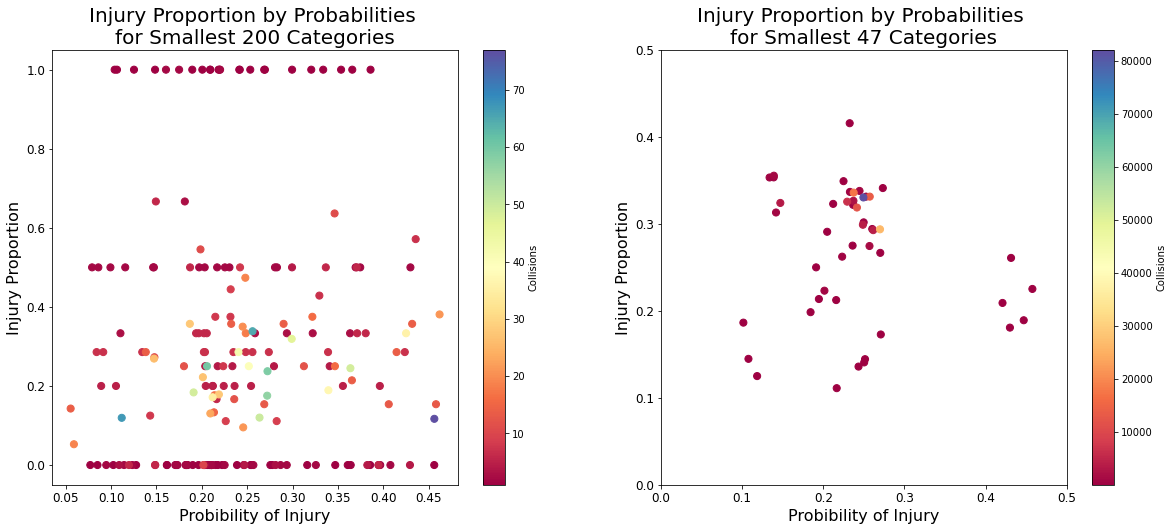

In [51]:
n = 200
smallProbs = probs.sort_values('Collisions').iloc[:n]
largeProbs = probs.sort_values('Collisions').iloc[n:]
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(20,8))
ax1 = smallProbs.plot(x='LogReg Probability of Injury',
                y='Injury Proportion', kind = 'scatter', c='Collisions', 
                colormap=cm.Spectral, colorbar=True,
                     sharex=False, fontsize=12, s=50, ax=axes[0])
ax1.set_xlabel('Probibility of Injury', fontsize = 16)
ax1.set_ylabel('Injury Proportion', fontsize = 16)
ax1.set_title(label = "Injury Proportion by Probabilities \nfor Smallest "+str(n)+" Categories", 
                     fontdict= {'fontsize':20}, loc="Center")


ax2 = largeProbs.plot(x='LogReg Probability of Injury',
                y='Injury Proportion', kind = 'scatter', c='Collisions', 
                colormap=cm.Spectral, colorbar=True, 
                     sharex=False, fontsize=12, s=50, ax=axes[1],
                     xlim=(0,.5), ylim = (0,.5))
ax2.set_xlabel('Probibility of Injury', fontsize = 16)
ax2.set_ylabel('Injury Proportion', fontsize = 16)
ax2.set_title(label = "Injury Proportion by Probabilities \nfor Smallest "+str(247-n)+" Categories", 
                     fontdict= {'fontsize':20}, loc="Center")
plt.savefig('Injury Proportion by Probabilities split by size.png')

## Discussion <a name="discussion"></a>

Some useful things to note is the limitations of three categorical variables explaining a classification when most combinations resulted in many accidents with and without injury. Removing the smallest categories in order to help the models generalize resulted in many of the variable combinations differing drastically in probability and proportion. I would venture to guess that if the sample sizes increased, the proportions would move toward the probabilities. This especially true for any of the combinations with 0% or 100% of collisions resulting in injury. 

Also worth noting, Logistic Regression and K-Nearest Neighbors were equally effective in understanding the data but I would recommend avoiding K-Nearest Neighbors for large data sets, as the processing time to train and predict was much higher than it was for Logistic Regression.

## Conclusion <a name="conclusion"></a>

Analyzing just weather, road conditions, and light conditions, can not predict an injury, but it does show which situations may be more dangerous, when considering one’s own safety. Particularly, icy conditions at night seemed to be the most likely to result in injury. A future analysis might take into account driver states, such as intoxication, or driver choices like speeding. These things are more easily changed by the individual and can help an average driver.

# Bonus Graphic

In [ ]:
# Leaving this code in because the Visualization is interactive which is fun but too busy to have value as a vizualization
# Uncomment and run if you are interested.
# import plotly.express as px
# fig = px.treemap(comb, path=['WEATHER', 'ROADCOND', 'LIGHTCOND'],values='X', color='Injury %', width = 1000, height=1000)
# fig.show()